In [111]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [112]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [113]:
# Read the dataset
df = pd.read_csv('osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [114]:
# Apply Pandas Profiling
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='New_Diabetes.html')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [116]:
# Display missing values
print(df.isnull().sum())

# # Example strategies for filling missing values
df['Alcohol Consumption'].fillna('None', inplace=True)
df['Medical Conditions'].fillna('None', inplace=True)
df['Medications'].fillna('None', inplace=True)

#Alternatively, drop rows with missing values
#df.dropna(inplace=True)


Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


C:\Users\Shuvo\AppData\Local\Temp\ipykernel_10108\2051574432.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol Consumption'].fillna('None', inplace=True)
C:\Users\Shuvo\AppData\Local\Temp\ipykernel_10108\2051574432.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [117]:
print(df.isnull().sum())

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64


In [118]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

binary_columns = ['Gender', 'Family History', 'Prior Fractures','Smoking','Hormonal Changes', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity']
label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

multi_category_columns = ['Race/Ethnicity','Medical Conditions', 'Medications' , 'Alcohol Consumption']
for col in multi_category_columns:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col])

# Convert all One-Hot Encoded columns to integer type (1s and 0s)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Ensure target variable is also encoded if necessary
df['Osteoporosis'] = label_encoder.fit_transform(df['Osteoporosis'])


In [119]:
print(df.columns)


Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Prior Fractures', 'Osteoporosis',
       'Race/Ethnicity_African American', 'Race/Ethnicity_Asian',
       'Race/Ethnicity_Caucasian', 'Medical Conditions_Hyperthyroidism',
       'Medical Conditions_None', 'Medical Conditions_Rheumatoid Arthritis',
       'Medications_Corticosteroids', 'Medications_None',
       'Alcohol Consumption_Moderate', 'Alcohol Consumption_None'],
      dtype='object')


In [120]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,...,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Medical Conditions_Hyperthyroidism,Medical Conditions_None,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Medications_None,Alcohol Consumption_Moderate,Alcohol Consumption_None
0,1734616,69,0,0,1,1,1,1,1,1,...,0,1,0,0,0,1,1,0,1,0
1,1419098,32,0,0,1,1,1,1,1,0,...,0,1,0,0,1,0,0,1,0,1
2,1797916,89,0,1,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,1,0
3,1805337,78,0,0,0,1,0,0,1,1,...,0,0,1,0,0,1,1,0,0,1
4,1351334,38,1,1,1,0,1,1,0,1,...,1,0,0,0,0,1,0,1,0,1


In [121]:
df.drop('Medical Conditions_None', axis=1, inplace=True)
df.drop('Alcohol Consumption_None', axis=1, inplace=True)
df.drop('Medications_None', axis=1, inplace=True)

In [122]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaleVars = ['Age']
mms = MinMaxScaler()
df[scaleVars] = mms.fit_transform(df[scaleVars])


In [123]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Osteoporosis,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Alcohol Consumption_Moderate
0,1734616,0.708333,0,0,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1
1,1419098,0.194444,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0
2,1797916,0.986111,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1
3,1805337,0.833333,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0
4,1351334,0.277778,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0


In [124]:
# Define features and target
X = df.drop(columns=['Osteoporosis', 'Id'])
y = df['Osteoporosis']

In [125]:
X.head()

,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Alcohol Consumption_Moderate
0,0.708333,0,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1
1,0.194444,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0
2,0.986111,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1
3,0.833333,0,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0
4,0.277778,1,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0


In [126]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Osteoporosis, dtype: int64

In [127]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)

In [128]:
X_train.head()

,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Alcohol Consumption_Moderate
1211,0.111111,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0
426,0.083333,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0
221,0.263889,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
562,0.388889,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1
1408,0.222222,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0


In [129]:
y_train.head()

1211    0
426     1
221     1
562     1
1408    0
Name: Osteoporosis, dtype: int64

In [130]:
X_test.head()

,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Alcohol Consumption_Moderate
1239,0.027778,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1
1946,0.055556,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1
1531,0.013889,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1
181,0.944444,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1
1280,0.277778,1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0


In [131]:
y_test.head()

1239    0
1946    0
1531    0
181     1
1280    0
Name: Osteoporosis, dtype: int64

In [132]:
# import numpy as np
# # Fix zero values
# colzero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

# for cols in colzero:
#     med = X_train[cols].median()
#     X_train[cols]=np.where(X_train[cols]==0,med,X_train[cols])
#     X_test[cols]=np.where(X_test[cols]==0,med,X_test[cols])


In [133]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1566, 17)
X_test shape: (392, 17)
y_train shape: (1566,)
y_test shape: (392,)


In [134]:
df.columns

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Prior Fractures', 'Osteoporosis',
       'Race/Ethnicity_African American', 'Race/Ethnicity_Asian',
       'Race/Ethnicity_Caucasian', 'Medical Conditions_Hyperthyroidism',
       'Medical Conditions_Rheumatoid Arthritis',
       'Medications_Corticosteroids', 'Alcohol Consumption_Moderate'],
      dtype='object')

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

def evaluate_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(random_state = 20),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'XGBoost': XGBClassifier(),
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    for name, classifier in classifiers.items():
        classifier.fit(train_X, train_y)
        predictions = classifier.predict(test_X)
        
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        roc_auc = roc_auc_score(test_y, predictions)
        
        results.loc[name] = [accuracy, precision, recall, f1, roc_auc]
    
    return results

# Example usage:
# Assuming train_X, train_y, test_X, and test_y are already defined
# results_df = evaluate_classifiers(train_X, train_y, test_X, test_y)
# print(results_df)


In [136]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
KNN                  0.647959   0.620879  0.620879  0.620879  0.646154
Decision Tree        0.834184   0.774648  0.906593  0.835443  0.839011
Logistic Regression  0.857143   0.850000  0.840659  0.845304  0.856044
SVC                  0.857143   0.956522  0.725275  0.825000  0.848352
Random Forest        0.900510   0.949686  0.829670  0.885630  0.895788
Naive Bayes          0.887755   0.925926  0.824176  0.872093  0.883516
Gradient Boosting    0.936224   0.975758  0.884615  0.927954  0.932784
AdaBoost             0.938776   1.000000  0.868132  0.929412  0.934066
XGBoost              0.897959   0.890110  0.890110  0.890110  0.897436


c:\Users\Shuvo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [137]:
# model = RandomForestClassifier(random_state=26)
# model.fit(X_train, y_train)

# # Get feature importances
# importances = model.feature_importances_
# feature_names = X.columns  # Assuming X is a pandas DataFrame

# # Find the most irrelevant feature
# most_irrelevant_index = np.argmin(importances)
# most_irrelevant_feature = feature_names[most_irrelevant_index]
# print(f"Most irrelevant feature: {most_irrelevant_feature} with importance: {importances[most_irrelevant_index]}")

# # Remove the most irrelevant feature
# X_reduced = X.drop(columns=[most_irrelevant_feature])

# # Verify the new shape of the feature matrix
# print(f"Original shape: {X.shape}, Reduced shape: {X_reduced.shape}")

# # Split the data again after dropping the feature
# X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=26)

In [138]:
X_train.head()

,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Alcohol Consumption_Moderate
1211,0.111111,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0
426,0.083333,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0
221,0.263889,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
562,0.388889,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1
1408,0.222222,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0


In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import pandas as pd

def evaluate_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(random_state=20),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'XGBoost': XGBClassifier(),
    }
    
    columns = ['Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score', 'Test ROC AUC']
    results = pd.DataFrame(columns=columns)
    
    for name, classifier in classifiers.items():
        classifier.fit(train_X, train_y)
        
        # Training predictions and metrics
        train_predictions = classifier.predict(train_X)
        train_accuracy = accuracy_score(train_y, train_predictions)
        
        # Test predictions and metrics
        test_predictions = classifier.predict(test_X)
        test_accuracy = accuracy_score(test_y, test_predictions)
        test_precision = precision_score(test_y, test_predictions)
        test_recall = recall_score(test_y, test_predictions)
        test_f1 = f1_score(test_y, test_predictions)
        test_roc_auc = roc_auc_score(test_y, test_predictions)
        
        # Store results
        results.loc[name] = [train_accuracy, test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
    
    return results

# Example usage
# Assuming train_X, train_y, test_X, test_y are already defined
# results = evaluate_classifiers(train_X, train_y, test_X, test_y)
# print(results)


In [140]:
resultsp_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(resultsp_df)

c:\Users\Shuvo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Train Accuracy  Test Accuracy  Test Precision  \
KNN                        0.798212       0.647959        0.620879   
Decision Tree              0.998723       0.836735        0.775701   
Logistic Regression        0.823755       0.857143        0.850000   
SVC                        0.872925       0.857143        0.956522   
Random Forest              0.998723       0.895408        0.937888   
Naive Bayes                0.842912       0.887755        0.925926   
Gradient Boosting          0.908685       0.936224        0.975758   
AdaBoost                   0.892720       0.938776        1.000000   
XGBoost                    0.995530       0.897959        0.890110   

                     Test Recall  Test F1 Score  Test ROC AUC  
KNN                     0.620879       0.620879      0.646154  
Decision Tree           0.912088       0.838384      0.841758  
Logistic Regression     0.840659       0.845304      0.856044  
SVC                     0.725275       0.82

In [141]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV, train_test_split

def evaluate_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': (KNeighborsClassifier(), {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }),
        'Decision Tree': (DecisionTreeClassifier(), {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }),
        'Logistic Regression': (LogisticRegression(), {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga']
        }),
        'SVC': (SVC(random_state=20), {
            'C': [0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.01, 0.001],
            'kernel': ['rbf', 'linear']
        }),
        'Random Forest': (RandomForestClassifier(), {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }),
        'AdaBoost': (AdaBoostClassifier(), {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1, 10]
        }),
        'XGBoost': (XGBClassifier(), {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9]
        }),
        'Gradient Boosting': (GradientBoostingClassifier(), {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9]
        }),
    }
    
    results = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    for name, (classifier, params) in classifiers.items():
        grid_search = GridSearchCV(estimator=classifier, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(train_X, train_y)
        
        best_model = grid_search.best_estimator_
        
        # Training predictions and metrics
        train_predictions = best_model.predict(train_X)
        train_accuracy = accuracy_score(train_y, train_predictions)
        
        # Test predictions and metrics
        test_predictions = best_model.predict(test_X)
        test_accuracy = accuracy_score(test_y, test_predictions)
        test_precision = precision_score(test_y, test_predictions)
        test_recall = recall_score(test_y, test_predictions)
        test_f1 = f1_score(test_y, test_predictions)
        test_roc_auc = roc_auc_score(test_y, test_predictions)
        
        # Store results
        results.loc[name] = [train_accuracy, test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
    
    return results

# Example usage:
# Assuming train_X, train_y, test_X, and test_y are already defined
# results_df = evaluate_classifiers(train_X, train_y, test_X, test_y)
# print(results_df)


In [142]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
print(results_df)

c:\Users\Shuvo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Train Accuracy  Test Accuracy  Precision    Recall  \
KNN                        0.750319       0.663265   0.637363  0.637363   
Decision Tree              0.925926       0.892857   0.880435  0.890110   
Logistic Regression        0.835249       0.885204   0.925466  0.818681   
SVC                        0.850575       0.882653   0.953333  0.785714   
Random Forest              0.890166       0.885204   0.947712  0.796703   
AdaBoost                   0.906130       0.946429   1.000000  0.884615   
XGBoost                    0.906769       0.938776   0.981707  0.884615   
Gradient Boosting          0.906130       0.946429   1.000000  0.884615   

                     F1 Score   ROC AUC  
KNN                  0.637363  0.661538  
Decision Tree        0.885246  0.892674  
Logistic Regression  0.868805  0.880769  
SVC                  0.861446  0.876190  
Random Forest        0.865672  0.879304  
AdaBoost             0.938776  0.942308  
XGBoost              0.930636 

In [143]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from xgboost import XGBClassifier

# def evaluate_classifiers_cv(X, y):
#     classifiers1 = {
#         'KNN': (KNeighborsClassifier(), {
#             'n_neighbors': [3, 5, 7, 9],
#             'weights': ['uniform', 'distance']
#         }),
#         'Decision Tree': (DecisionTreeClassifier(), {
#             'max_depth': [None, 10, 20, 30],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4]
#         }),
#         'Logistic Regression': (LogisticRegression(), {
#             'C': [0.01, 0.1, 1, 10, 100],
#             'solver': ['liblinear', 'saga']
#         }),
#         'SVC': (SVC(random_state=20), {
#             'C': [0.1, 1, 10, 100],
#             'gamma': [1, 0.1, 0.01, 0.001],
#             'kernel': ['rbf', 'linear']
#         }),
#         'Random Forest': (RandomForestClassifier(), {
#             'n_estimators': [50, 100, 200],
#             'max_depth': [None, 10, 20, 30],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4]
#         }),
#         'AdaBoost': (AdaBoostClassifier(), {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 1, 10]
#         }),
#         'XGBoost': (XGBClassifier(), {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 5, 7, 9]
#         }),
#         'Gradient Boosting': (GradientBoostingClassifier(), {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 5, 7, 9]
#         }),
#     }
    
#     results1 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
#     for name, (classifier, params) in classifiers1.items():
#         grid_search1 = GridSearchCV(estimator=classifier, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
#         grid_search1.fit(X, y)
        
#         best_model1 = grid_search1.best_estimator_
        
#         # Perform cross-validation
#         accuracy1 = cross_val_score(best_model1, X, y, cv=5, scoring='accuracy').mean()
#         precision1 = cross_val_score(best_model1, X, y, cv=5, scoring='precision').mean()
#         recall1 = cross_val_score(best_model1, X, y, cv=5, scoring='recall').mean()
#         f11 = cross_val_score(best_model1, X, y, cv=5, scoring='f1').mean()
#         roc_auc1 = cross_val_score(best_model1, X, y, cv=5, scoring='roc_auc').mean()
        
#         results1.loc[name] = [accuracy1, precision1, recall1, f11, roc_auc1]
    
#     return results1

# # Example usage:
# # Assuming X and y are already defined
# # results_df = evaluate_classifiers_cv(X, y)
# # print(results_df)


In [144]:
# results_df = evaluate_classifiers_cv(X,y)
# print(results_df)

In [145]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def draw_decision_tree(decision_tree, feature_names=None, class_names=None):
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

# Example usage:
# Assuming decision_tree is your trained DecisionTreeClassifier instance
# draw_decision_tree(decision_tree, feature_names=your_feature_names, class_names=your_class_names)


In [146]:
feature_names = [str(name) for name in X_train.columns]
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)
# Draw the decision tree


DecisionTreeClassifier(max_depth=3)

In [147]:
from sklearn.tree import export_graphviz

export_graphviz(
        dt,
        out_file=str(IMAGES_PATH / "osteoporesis.dot"), 
        feature_names=X_train.columns,
        class_names=['0', '1'],
        rounded=True,
        filled=True
    )

Go to https://dreampuf.github.io/GraphvizOnline/ , generate the image and save it as 'dec-tree.png'

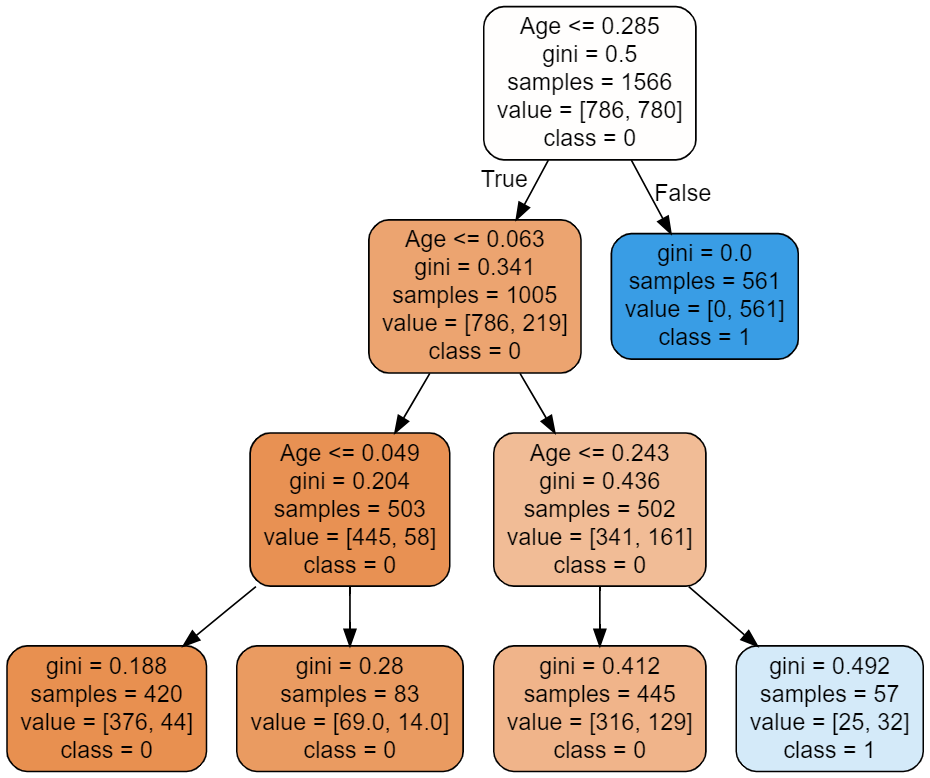

In [148]:
from IPython import display
display.Image(IMAGES_PATH / 'ooo.png')

# XAI using LIME

In [149]:
#!pip install lime

In [150]:
import lime
import lime.lime_tabular

In [151]:
X_train.columns

Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Body Weight',
       'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking',
       'Prior Fractures', 'Race/Ethnicity_African American',
       'Race/Ethnicity_Asian', 'Race/Ethnicity_Caucasian',
       'Medical Conditions_Hyperthyroidism',
       'Medical Conditions_Rheumatoid Arthritis',
       'Medications_Corticosteroids', 'Alcohol Consumption_Moderate'],
      dtype='object')

In [152]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values,
    mode='classification',
    feature_names=X_train.columns)

In [153]:
exp = explainer.explain_instance(X_test.iloc[1], dt.predict_proba)
exp.show_in_notebook(show_table = True)

c:\Users\Shuvo\anaconda3\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\Shuvo\anaconda3\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\Shuvo\anaconda3\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

In [154]:
X_test.head()

,Age,Gender,Hormonal Changes,Family History,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Prior Fractures,Race/Ethnicity_African American,Race/Ethnicity_Asian,Race/Ethnicity_Caucasian,Medical Conditions_Hyperthyroidism,Medical Conditions_Rheumatoid Arthritis,Medications_Corticosteroids,Alcohol Consumption_Moderate
1239,0.027778,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1
1946,0.055556,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1
1531,0.013889,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,1
181,0.944444,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1
1280,0.277778,1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0


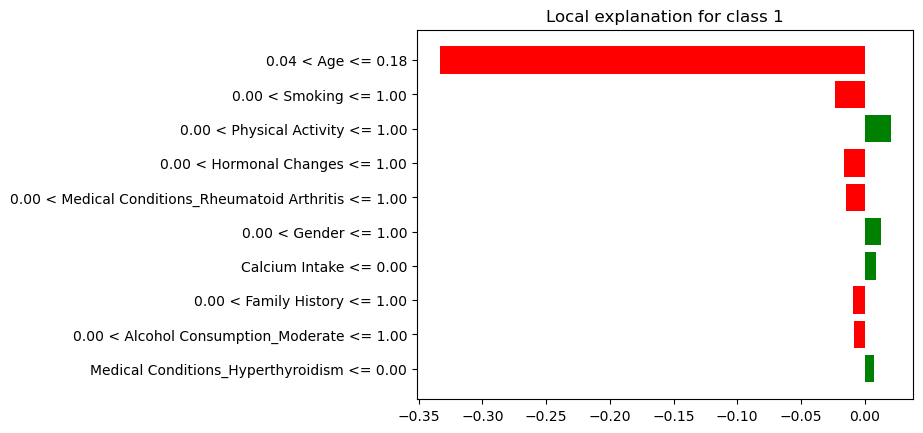

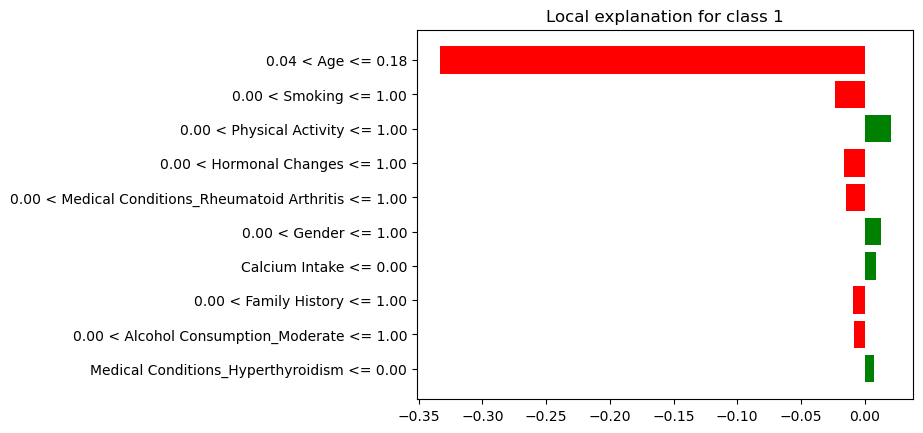

In [155]:
exp.as_pyplot_figure()

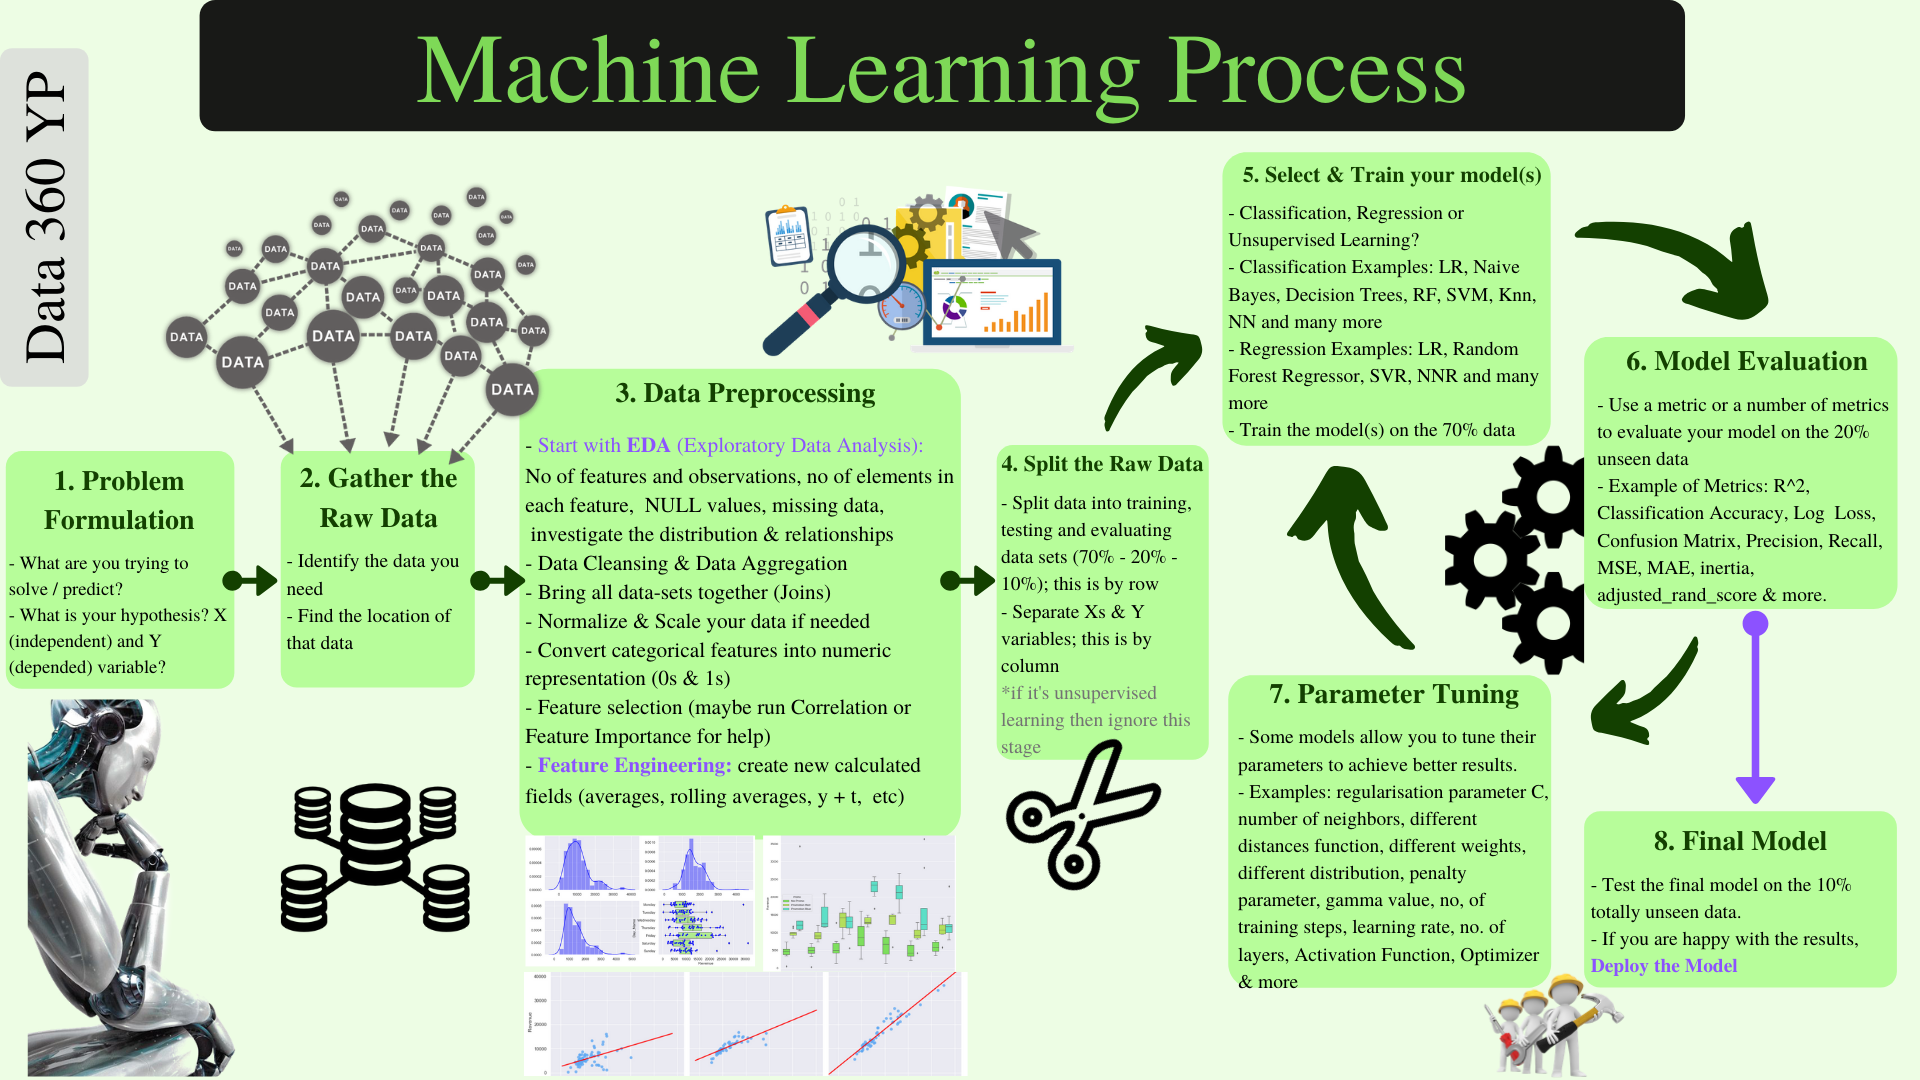

In [156]:
display.Image('Machine Learning.png')